In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
data = pd.read_csv("data\\bank-full.csv")

In [9]:
data_dummies = pd.get_dummies(data)

In [10]:
data_dummies = data_dummies.drop(["y_no","duration","housing_no"],axis=1)

In [11]:
high_cov = {}
already_done = []
for first_col in data_dummies:
    already_done.append(first_col)
    for second_col in data_dummies:
        if second_col not in already_done:
            X = data_dummies[[first_col]].as_matrix()
            Y = data_dummies[[second_col]].as_matrix()
            X = preprocessing.scale(X)
            Y = preprocessing.scale(Y)
            reg = linear_model.LinearRegression()
            reg.fit(X,Y)
            beta = reg.coef_
            sec1 = second_col.split("_")[0]
            first1 = first_col.split("_")[0]
            if (np.abs(beta[0][0]) > 0.3) and (sec1 != first1) and first_col != "y_yes" and second_col != "y_yes":
                st = str(first_col) + "_vs_" + str(second_col)
                high_cov[st]=beta
                

In [12]:
key_list = []
cov_list = []
for key in high_cov:
    key_list.append(key)
    cov_list.append(high_cov[key][0][0])

In [13]:
cov_df = pd.DataFrame()

In [14]:
cov_df["correlation"]=key_list
cov_df["beta"]=cov_list

In [15]:
cov_df

,correlation,beta
0,job_blue-collar_vs_education_primary,0.342688
1,previous_vs_poutcome_failure,0.350627
2,contact_unknown_vs_month_may,0.425700
3,previous_vs_poutcome_other,0.306615
4,pdays_vs_poutcome_other,0.389791
5,housing_yes_vs_month_aug,-0.305641
6,contact_unknown_vs_month_jun,0.453077
7,previous_vs_poutcome_unknown,-0.532763
8,job_blue-collar_vs_education_tertiary,-0.320541
9,age_vs_job_retired,0.447378


In [16]:
key_list2 = []
for i in key_list:
    key_list2 = key_list2 + i.split("_vs_")

In [17]:
correlation_with_y = {}
cor_w_y_arr = []
cols = []
Y = data_dummies[["y_yes"]].as_matrix()
for col in key_list2:
    cols.append(col)
    X = data_dummies[[col]].as_matrix()
    X = preprocessing.scale(X)
    reg = linear_model.LinearRegression()
    reg.fit(X,Y)
    beta = reg.coef_
    cor_w_y_arr.append(beta[0][0])
    correlation_with_y[col] = beta[0][0]

In [18]:
cov_dfY = pd.DataFrame()
cov_dfY["Variables"] = cols
cov_dfY["WithY"]=cor_w_y_arr

In [19]:
cov_dfY

,Variables,WithY
0,job_blue-collar,-0.023168
1,education_primary,-0.012983
2,previous,0.029966
3,poutcome_failure,0.003177
4,contact_unknown,-0.048511
5,month_may,-0.032944
6,previous,0.029966
7,poutcome_other,0.010270
8,pdays,0.033304
9,poutcome_other,0.010270


In [20]:
cov_dfY.T[li].T["Variables"]

NameError: name 'li' is not defined

In [22]:
cov_dfY["WithY"].as_matrix()
lag_list = [0]
for i in cov_dfY["WithY"].as_matrix():
    lag_list.append(i)
greater_df = pd.DataFrame()
greater_df["unlagged"] = cov_dfY["WithY"]
greater_df["unlagged"] = greater_df.apply(lambda row: np.abs(row["unlagged"]),axis=1)
greater_df["lagged"] = pd.Series(lag_list)[:-1]
greater_df["lagged"] = greater_df.apply(lambda row: np.abs(row["lagged"]),axis=1)
    
    

In [23]:
greater_df["difference"]=greater_df.apply(lambda row: row["unlagged"]-row["lagged"],axis=1)

In [24]:
li = [i*2 for i in range(len(greater_df)/2)]

In [25]:
transformed = greater_df.T

In [26]:
variable_rel_imp = transformed[li].T

In [27]:
cov_dfY.T[li].T["Variables"]

0      job_blue-collar
2             previous
4      contact_unknown
6             previous
8                pdays
10         housing_yes
12     contact_unknown
14            previous
16     job_blue-collar
18                 age
20               pdays
22         housing_yes
24      job_management
26                 age
28               pdays
30    contact_cellular
32      job_management
34               pdays
36    contact_cellular
Name: Variables, dtype: object

In [35]:
variable_rel_imp["var"]=cov_dfY.T[li].T["Variables"]

In [36]:
variable_rel_imp["choose"] = variable_rel_imp.apply(lambda row: 1 if row["difference"]>0 else 0,axis=1)

In [37]:
variable_rel_imp

,unlagged,lagged,difference,choose,var
0,0.023168,0.000000,0.023168,1,job_blue-collar
2,0.029966,0.012983,0.016984,1,previous
4,0.048511,0.003177,0.045334,1,contact_unknown
6,0.029966,0.032944,-0.002978,0,previous
8,0.033304,0.010270,0.023034,1,pdays
10,0.044730,0.010270,0.034460,1,housing_yes
12,0.048511,0.002744,0.045767,1,contact_unknown
14,0.029966,0.005401,0.024565,1,previous
16,0.023168,0.053690,-0.030523,0,job_blue-collar
18,0.008085,0.021357,-0.013272,0,age


In [38]:
drop_cols = variable_rel_imp[variable_rel_imp["choose"]==0]["var"].as_matrix()

In [39]:
data_dummies2 = data_dummies.drop(drop_cols,axis=1)

In [40]:
data_dummies2.columns

Index([u'balance', u'day', u'campaign', u'pdays', u'job_admin.',
       u'job_entrepreneur', u'job_housemaid', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'education_primary', u'education_secondary', u'education_tertiary',
       u'education_unknown', u'default_no', u'default_yes', u'loan_no',
       u'loan_yes', u'contact_cellular', u'contact_telephone',
       u'contact_unknown', u'month_apr', u'month_aug', u'month_dec',
       u'month_feb', u'month_jan', u'month_jul', u'month_jun', u'month_mar',
       u'month_may', u'month_nov', u'month_oct', u'month_sep',
       u'poutcome_failure', u'poutcome_other', u'poutcome_success',
       u'poutcome_unknown', u'y_yes'],
      dtype='object')

In [42]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
X = data_dummies2.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = data_dummies2[["y_yes"]].as_matrix()
reg.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
j = []
for i in reg.coef_[0]:
    j.append(i)

In [44]:
columns_beta = pd.DataFrame()
columns_beta["Cols"] = data_dummies2.columns[:-1]
columns_beta["Betas"] = j

In [45]:
columns_beta["Abs_Beta"] = columns_beta.apply(lambda row: np.abs(row["Betas"]),axis=1)

In [46]:
columns_beta.drop([19,23])

,Cols,Betas,Abs_Beta
0,balance,0.060408,0.060408
1,day,0.047406,0.047406
2,campaign,-0.275431,0.275431
3,pdays,-0.035716,0.035716
4,job_admin.,0.029238,0.029238
5,job_entrepreneur,-0.017344,0.017344
6,job_housemaid,-0.019534,0.019534
7,job_retired,0.144133,0.144133
8,job_self-employed,0.003805,0.003805
9,job_services,0.001498,0.001498


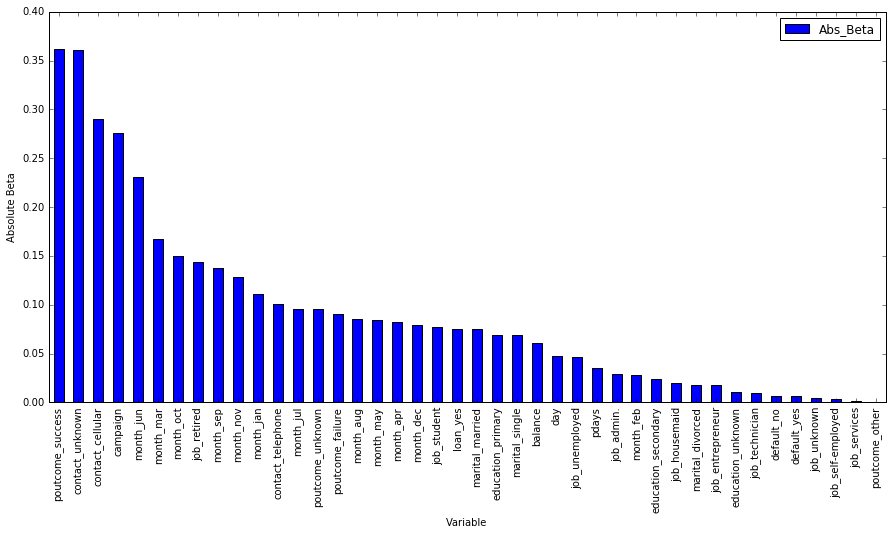

In [47]:
columns_beta.drop([19,23]).sort("Abs_Beta",ascending=False).plot(x="Cols",y="Abs_Beta",figsize=(15,7),kind="bar")
plt.xlabel("Variable")
plt.ylabel("Absolute Beta")

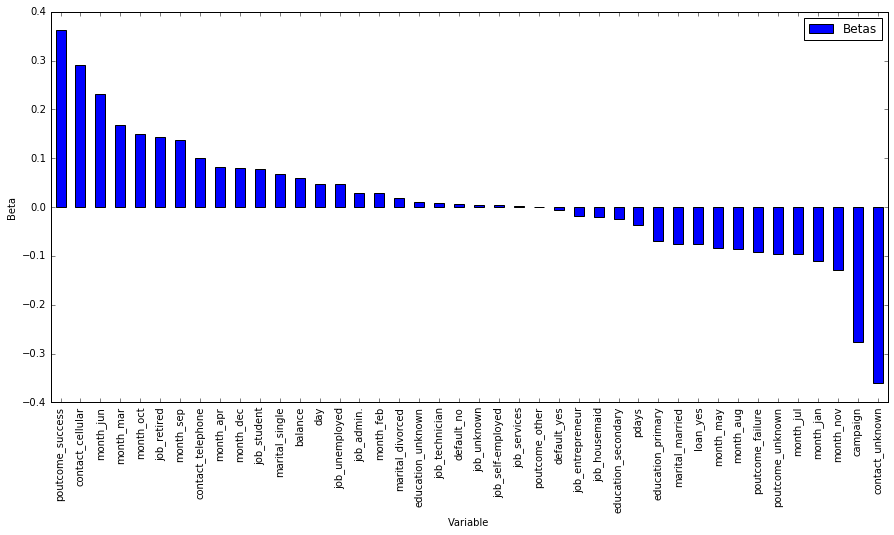

In [48]:
columns_beta.drop([19,23]).sort("Betas",ascending=False).plot(x="Cols",y="Betas",figsize=(15,7),kind="bar")
plt.xlabel("Variable")
plt.ylabel("Beta")

In [49]:
from sklearn.cross_validation import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [54]:
from sklearn.metrics import confusion_matrix

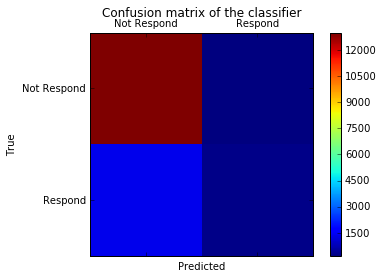

[[12995   180]
 [ 1430   315]]


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
X = data_dummies2.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = data_dummies2[["y_yes"]].as_matrix()
reg.fit(X,Y)

reg = LogisticRegression(class_weight={0:1,1:1})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print cm

In [56]:
cm = confusion_matrix(y_test,predictions)

In [57]:
test_probs = []
for i in reg.predict_proba(X):
    test_probs.append(1.0-i[0])

In [58]:
for i in data_dummies2.columns:
    print i

balance
day
campaign
pdays
job_admin.
job_entrepreneur
job_housemaid
job_retired
job_self-employed
job_services
job_student
job_technician
job_unemployed
job_unknown
marital_divorced
marital_married
marital_single
education_primary
education_secondary
education_tertiary
education_unknown
default_no
default_yes
loan_no
loan_yes
contact_cellular
contact_telephone
contact_unknown
month_apr
month_aug
month_dec
month_feb
month_jan
month_jul
month_jun
month_mar
month_may
month_nov
month_oct
month_sep
poutcome_failure
poutcome_other
poutcome_success
poutcome_unknown
y_yes


In [59]:
data_dummies2["Probability"]=test_probs

In [60]:
data["Probability"]=test_probs

In [61]:
data_sort = data.sort("Probability",ascending=False)

In [62]:
arr = [(j+1)*0.1 for j in range(9)]

In [63]:
arr

[0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9]

In [64]:

for i in arr:
    respondants =  sum((data_sort[data_sort["Probability"]>i]["y"]=="yes")*1)
    perc_respondants = float(respondants)/float(len(data_sort[data_sort["Probability"]>i]))
    print perc_respondants

0.217515942199
0.447389720761
0.537176547658
0.583629893238
0.645051194539
0.691885964912
0.735244519393
0.763231197772
0.764705882353


In [67]:
respondants =  sum((data_sort[data_sort["Probability"]>0]["y"]=="yes")*1)
perc_respondants = float(respondants)/float(len(data_sort[data_sort["Probability"]>0]))
print perc_respondants

0.116984804583


In [68]:
arr = [int(round((j)*4521.1)) for j in range(10)]

In [69]:
correct = []
for i in arr:
    num_correct = sum((data_sort[i:(i+4521)]["y"]=="yes")*1)
    correct.append(num_correct)

In [72]:
correct2 = [correct[0]]
for i in range(len(correct)-1):
    correct2.append(correct2[i] + correct[i+1])
    

In [73]:
arr.append(40690+4521)

In [74]:
success_fracs = []
for i in range(len(arr[1:])):
    success_fracs.append(float(correct2[i])/float(arr[1:][i]))

In [75]:
correct3 = [0]
straight_line = [0]
k = 0
for i in correct2:
    correct3.append(i)
    k = k + 4521*0.11698480458295547
    straight_line.append(k)

In [77]:
t = []
for i in range(11):
    t.append(i*10)
print t

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [78]:
Lift_df = pd.DataFrame(correct3)
Lift_df.columns = ["Logistic Choice"]
Lift_df["Base Case"] = straight_line
Lift_df.index = t

In [79]:
Lift_df

,Logistic Choice,Base Case
0,0,0.000000
10,2089,528.888302
20,2868,1057.776603
30,3408,1586.664905
40,3804,2115.553206
50,4192,2644.441508
60,4494,3173.329809
70,4772,3702.218111
80,4989,4231.106412
90,5175,4759.994714


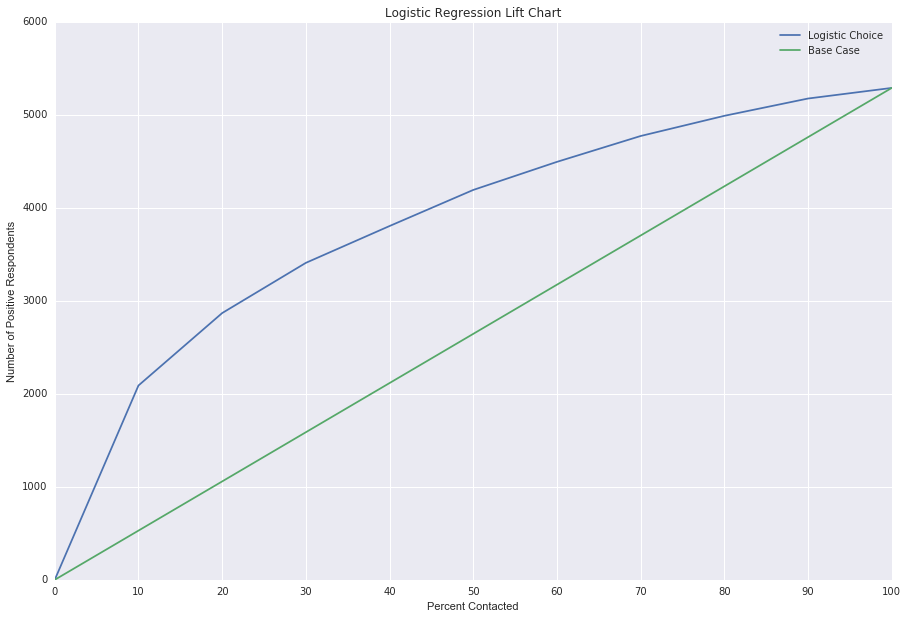

In [81]:
import seaborn as sns
Lift_df.plot(figsize=(15,10),xticks=t)
plt.xlabel("Percent Contacted")
plt.ylabel("Number of Positive Respondents")
plt.title("Logistic Regression Lift Chart")

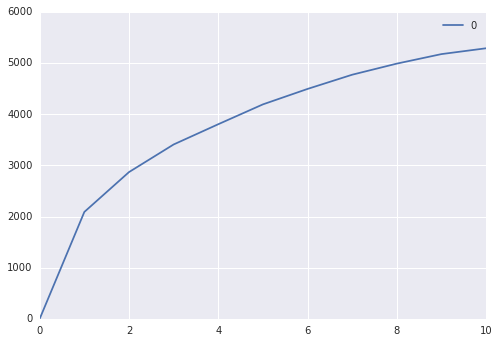

In [82]:
lift_plot = pd.DataFrame(correct3).plot()

In [83]:
ed_prim = data_dummies[data_dummies['education_primary']==1].drop(['education_primary','education_secondary','education_tertiary'],axis=1)
ed_sec = data_dummies[data_dummies['education_secondary']==1].drop(['education_primary','education_secondary','education_tertiary'],axis=1)
ed_tert = data_dummies[data_dummies['education_tertiary']==1].drop(['education_primary','education_secondary','education_tertiary'],axis=1)

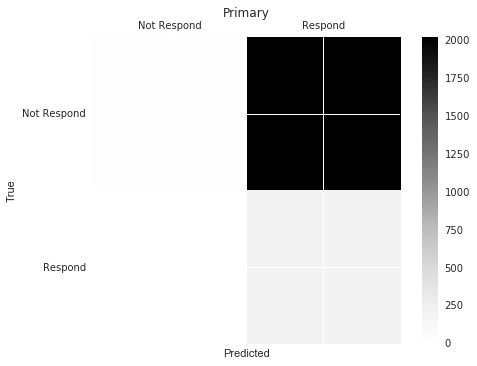

[[  34 2022]
 [   0  205]]


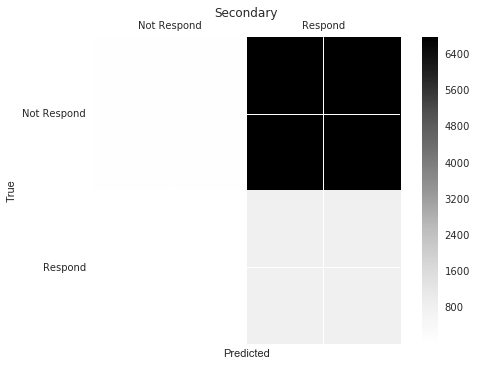

[[  49 6789]
 [   1  818]]


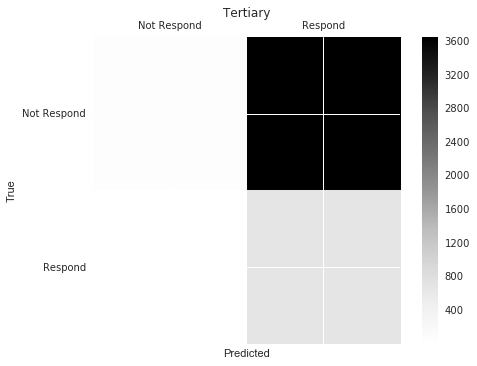

[[  68 3652]
 [   1  669]]


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

X = ed_prim.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = ed_prim[["y_yes"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = LogisticRegression(class_weight={0:1,1:55})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Primary")
plt.show()
print cm

X = ed_sec.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = ed_sec[["y_yes"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = LogisticRegression(class_weight={0:1,1:62})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Secondary")
plt.show()
print cm

X = ed_tert.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = ed_tert[["y_yes"]].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

reg = LogisticRegression(class_weight={0:1,1:62})
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

cm = confusion_matrix(y_test,predictions)
labels = ['Not Respond', 'Respond']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Tertiary")
plt.show()
print cm

In [85]:
329.0/(1416.0+329.0)

0.18853868194842408

In [86]:
drop_cols2 = []
for i in drop_cols:
    drop_cols2.append(i)

In [87]:
for i in ["previous", "pdays", "age", "job_management"]:
    drop_cols2.append(i)

In [88]:
drops = pd.DataFrame()
drops["To Drop"]=drop_cols2

In [89]:
drop_cols = drops["To Drop"].as_matrix()

In [90]:
data2 = data_dummies.drop(drop_cols,axis=1)

In [92]:

Y = data2["y_yes"].as_matrix()
X = data2.drop("y_yes",axis=1).as_matrix()
X = preprocessing.scale(X)
Y = preprocessing.scale(Y)


In [93]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
grad = GBC()
grad.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
y_test2 = []
for i in y_test:
    y_test2.append(i[0])

In [ ]:
grad_df = pd.DataFrame()
grad_df["Pred"]= pred.tolist()
grad_df["Actual"] = data_dummies["y_yes"]

In [ ]:
total = float(len(grad_df[grad_df["Actual"]==1]))
correct = float(len(grad_df[grad_df["Actual"]==1][grad_df["Pred"]==1]))
print correct/total

$$ number \space of \space columns \space in  \space dummy \space spreadsheet = 50 $$
$$ number \space of \space unique, \space unordered \space pairs = \frac{50!}{48!2!} = 1225$$